# Example of Basic Web Scraping

In [1]:
cd C:\Users\simonkc\Documents\simonkc\Documents\STAT 7008\2018_Notes\Jupyter_Notebook

C:\Users\simonkc\Documents\simonkc\Documents\STAT 7008\2018_Notes\Jupyter_Notebook


In [2]:
# requests for fetching html of website
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Make the GET request to a url
r = requests.get('http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html')

In [4]:
# Extract the content
c = r.content

In [5]:
# Create a soup object
soup = BeautifulSoup(c)

#### Our data is in there somewhere, but we need to extract it. To select our table from the soup, we need to find the right CSS selectors. One way to do this is by going to the webpage and inspecting the element. In this case, we can also just look at the soup and see that our table resides under a "\\<ul\\>" HTML tag with the attribute class = "article__unordered-list" . Using this info and the .find method of our soup object, we can pull out the main article content.

In [6]:
# Find the element on the webpage
main_content = soup.find('ul', attrs = {'class': 'article__unordered-list'})

#### This returns another soup object which is not quite specific enough. To select the table, we need to find the \\<ul\\> tag (see above image). We also want to deal with only the text in the table, so we use the .text attribute of the soup.

In [7]:
# Extract the relevant information as text
content = main_content.find_all('li')

In [8]:
content = [x.text for x in content]

In [9]:
content

['Grant Cornwell, College of Wooster (left in 2015): $911,651',
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913',
 'Mark Roosevelt, Antioch College, (left in 2015): $507,672',
 'Laurie Joyner, Wittenberg University (left in 2015): $463,504',
 'Richard Giese, University of Mount Union (left in 2015): $453,800',
 'Sean Decatur,Kenyon College: $451,698',
 'Adam Weinberg, Denison University: $435,322',
 'Daniel Dibiasio, Ohio Northern University: $414,716',
 'Denvy Bowman, Capital University (left in 2016): $388,570',
 'Anne Steele, Muskingum University (left in 2016): $384,233',
 'Kathy Krendl, Otterbein University: \xa0$378,035',
 'Rockwell Jones, Ohio Wesleyan University: $366,625',
 'Robert Helmer, Baldwin Wallace University: $365,616',
 'Robert Huntington, Heidelberg University: $300,005',
 'Lori Varlotta, Hiram College: $293,336',
 'Joseph Bruno, Marietta College (left in 2016): $288,295',
 'W. Richard Merriman Jr., University of Mount Union (started in June 2015): $22

In [10]:
r = re.compile(r'[,]\d{3}')

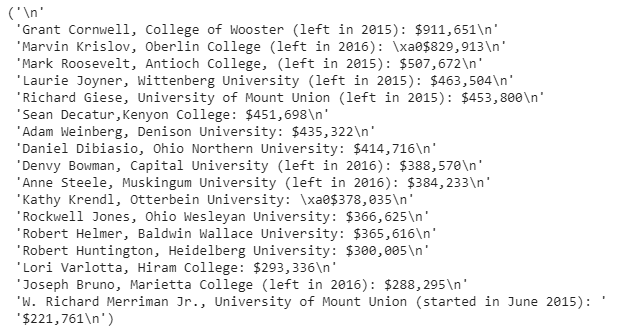

In [13]:
from IPython.display import Image
Image(filename='soup2.png')

#### The basic idea of regular expressions is we define a pattern (the “regular expression” or “regex”) that we want to match in a text string and then search in the string to return matches. 

#### There are 3 pieces of info we need to extract from the text table:
#### - The names of the presidents
#### - The names of the colleges
#### - The salaries

#### make use of the fact that each name is at the start of a line and ends with a comma. The code below creates a regular expression pattern, and then searches through the string to find all occurrences of the pattern:

In [11]:
# Create a pattern to match names
name_pattern = re.compile(r'^([A-Z]{1}[a-z. ]+){1,4}[,]', flags = re.M)

In [12]:
# Find all occurrences of the pattern
names = [name_pattern.match(x).group(0) for x in content]

In [13]:
names = [x.replace(',','') for x in names]
names

['Grant Cornwell',
 'Marvin Krislov',
 'Mark Roosevelt',
 'Laurie Joyner',
 'Richard Giese',
 'Sean Decatur',
 'Adam Weinberg',
 'Daniel Dibiasio',
 'Denvy Bowman',
 'Anne Steele',
 'Kathy Krendl',
 'Rockwell Jones',
 'Robert Helmer',
 'Robert Huntington',
 'Lori Varlotta',
 'Joseph Bruno',
 'W. Richard Merriman Jr.']

#### repeat the procedure with the colleges and the salary:

In [14]:
# Make school patttern and extract schools
school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
schools = [school_pattern.findall(x)[0] for x in content]

In [15]:
schools

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'University of Mount Union',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']

In [16]:
# Pattern to match the salaries
salary_pattern = re.compile(r'\$.+')
salaries = [salary_pattern.findall(x)[0] for x in content]

In [17]:
salaries

['$911,651',
 '$829,913',
 '$507,672',
 '$463,504',
 '$453,800',
 '$451,698',
 '$435,322',
 '$414,716',
 '$388,570',
 '$384,233',
 '$378,035',
 '$366,625',
 '$365,616',
 '$300,005',
 '$293,336',
 '$288,295',
 '$221,761']

In [18]:
# Messy salaries
salaries2 = ['$876,001', '$543,903', '$2453,896']

In [19]:
# Convert salaries to numbers in a list comprehension 
[int(''.join(s[1:].split(','))) for s in salaries2]

[876001, 543903, 2453896]

In [20]:
salaries = [int(''.join(s[1:].split(','))) for s in salaries]

In [21]:
salaries

[911651,
 829913,
 507672,
 463504,
 453800,
 451698,
 435322,
 414716,
 388570,
 384233,
 378035,
 366625,
 365616,
 300005,
 293336,
 288295,
 221761]

In [22]:
College_President_Salaries = pd.DataFrame([(x,y,float(z)) for x,y,z in zip(schools,names,salaries)])
College_President_Salaries.columns = ['College','President','Salary']

In [23]:
College_President_Salaries.head()

,College,President,Salary
0,College of Wooster,Grant Cornwell,911651.0
1,Oberlin College,Marvin Krislov,829913.0
2,Antioch College,Mark Roosevelt,507672.0
3,Wittenberg University,Laurie Joyner,463504.0
4,University of Mount Union,Richard Giese,453800.0


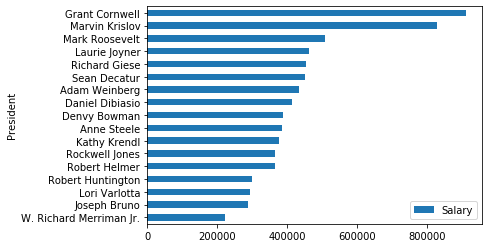

In [24]:
# Make a horizontal bar chart
College_President_Salaries.sort_values('Salary',ascending=True).plot(kind='barh', x = 'President', y = 'Salary')

In [25]:
sal_values=College_President_Salaries.sort_values('Salary',ascending=False)

In [26]:
sal_values.head()

,College,President,Salary
0,College of Wooster,Grant Cornwell,911651.0
1,Oberlin College,Marvin Krislov,829913.0
2,Antioch College,Mark Roosevelt,507672.0
3,Wittenberg University,Laurie Joyner,463504.0
4,University of Mount Union,Richard Giese,453800.0


In [27]:
pal = sns.color_palette("Greens_d", len(sal_values))
rank = sal_values["Salary"].argsort() 

In [28]:
rank

0     16
1     15
2     14
3     13
4     12
5     11
6     10
7      9
8      8
9      7
10     6
11     5
12     4
13     3
14     2
15     1
16     0
Name: Salary, dtype: int64

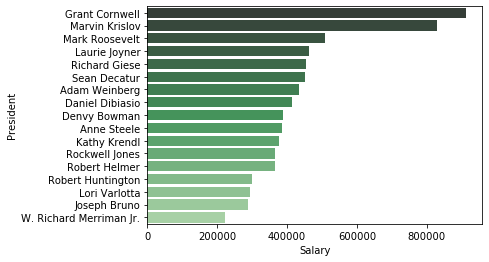

In [32]:
g=sns.barplot(x='Salary',y='President',data=sal_values, palette=np.array(pal[::-1])[rank])

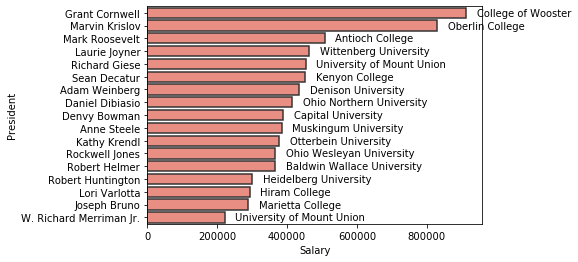

In [33]:
g=sns.barplot(x='Salary',y='President',data=sal_values, color='salmon',linewidth=1.5,edgecolor=".2")

for index, row in sal_values.iterrows():
    g.text(row.Salary+30000,index+0.25, row.College, color='black')

plt.show()